In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocess

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage
from skimage.transform import resize

import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [ ]:
# !unzip -uq "/content/drive/My Drive/ASL_Data.zip"
!unzip -o "/content/drive/My Drive/ASL_Data.zip" | awk 'BEGIN {ORS=" "} {if(NR%10==0)print "."}'

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [ ]:
batch_size = 10
imageSize = 76
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/asl_alphabet_train/asl_alphabet_train/'

In [ ]:
def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int64)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y

In [ ]:
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [ ]:
# train = pd.read_csv("/content/drive/MyDrive/archive/sign_mnist_train/sign_mnist_train.csv")
# test = pd.read_csv("/content/drive/MyDrive/archive/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 76, 76, 3)
The shape of y_train is :  (87000,)


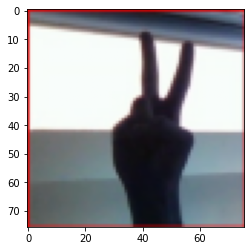

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, test_size=0.4,random_state=42,stratify=y_train)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5,random_state=42,stratify=y_val_test)

In [ ]:
y_cat_train = to_categorical(y_train,29)
y_cat_val = to_categorical(y_val,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_val.shape)
print(y_cat_test.shape)

(52200, 76, 76, 3)
(52200,)
(17400, 76, 76, 3)
(17400,)
(17400, 76, 76, 3)
(17400,)
(52200, 29)
(17400, 29)
(17400, 29)


(76, 76, 3)
22


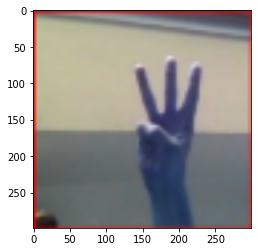

In [ ]:
print(X_train[0].shape)

image = cv2.resize(X_train[0], (299, 299))

plt.imshow(image)
print(y_train[0])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [ ]:
from keras.engine import training
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
input_shape = (76, 76, 3)
nclass = 29

base_model = tf.keras.applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(76, 76,3))
base_model.trainable = False

inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(nclass, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# add_model = Sequential()
# add_model.add(base_model)
# add_model.add(GlobalAveragePooling2D())
# add_model.add(Dropout(0.5))
# add_model.add(Dense(nclass, activation='softmax'))
# model = add_model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 76, 76, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 76, 76, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                59421     
                                                                 
Total params: 21,862,205
Trainable params: 59,421
Non-trainable params: 21,802,784
____________________________________________

In [ ]:
file_path="/content/best_model.h5"

# checkpoint = ModelCheckpoint(file_path, monitor='acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, mode='min', save_best_only=True)

# early = EarlyStopping(monitor="acc", mode="max", patience=15)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

callbacks_list = [es, mc] #early

model.fit(x=X_train,
          y=y_cat_train,
          validation_data=(X_val, y_cat_val),
          batch_size=32,
          epochs=60, 
          shuffle=True, 
          verbose=2,
          callbacks=callbacks_list)



Epoch 1/60

Epoch 1: val_loss improved from inf to 2.51765, saving model to /content/best_model.h5
1632/1632 - 54s - loss: 2.5652 - accuracy: 0.4934 - val_loss: 2.5176 - val_accuracy: 0.5809 - 54s/epoch - 33ms/step
Epoch 2/60

Epoch 2: val_loss did not improve from 2.51765
1632/1632 - 35s - loss: 2.4384 - accuracy: 0.5760 - val_loss: 2.6934 - val_accuracy: 0.6094 - 35s/epoch - 22ms/step
Epoch 3/60

Epoch 3: val_loss did not improve from 2.51765
1632/1632 - 36s - loss: 2.3970 - accuracy: 0.6029 - val_loss: 3.2664 - val_accuracy: 0.5948 - 36s/epoch - 22ms/step
Epoch 4/60

Epoch 4: val_loss did not improve from 2.51765
1632/1632 - 36s - loss: 2.4816 - accuracy: 0.6107 - val_loss: 2.7066 - val_accuracy: 0.6358 - 36s/epoch - 22ms/step
Epoch 5/60

Epoch 5: val_loss did not improve from 2.51765
1632/1632 - 36s - loss: 2.4245 - accuracy: 0.6247 - val_loss: 2.6362 - val_accuracy: 0.6504 - 36s/epoch - 22ms/step
Epoch 6/60

Epoch 6: val_loss did not improve from 2.51765
1632/1632 - 36s - loss: 2.

In [ ]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 10s 18ms/step - loss: 3.2775 - accuracy: 0.6560
Accuracy for test images: 65.598 %


## Fine-Tuning!

In [ ]:
file_path="/content/best_model.h5"
model = tf.keras.models.load_model(file_path, compile=False)

In [ ]:
# model.summary()
model.layers[2].trainable = True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 76, 76, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 76, 76, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                59421     
                                                                 
Total params: 21,862,205
Trainable params: 21,827,773
Non-trainable params: 34,432
____________________________________________

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Pretrain make sure: Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 12s 18ms/step - loss: 2.5502 - accuracy: 0.5836
Pretrain make sure: Accuracy for test images: 58.356 %


In [ ]:
model.fit(x=X_train,
          y=y_cat_train,
          validation_data=(X_val, y_cat_val),
          batch_size=32,
          epochs=10, 
          shuffle=True, 
          verbose=2,
          callbacks=callbacks_list)

Epoch 1/10

Epoch 1: val_loss improved from 2.51765 to 0.36247, saving model to /content/best_model.h5
1632/1632 - 106s - loss: 0.7923 - accuracy: 0.7628 - val_loss: 0.3625 - val_accuracy: 0.8844 - 106s/epoch - 65ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.36247 to 0.16832, saving model to /content/best_model.h5
1632/1632 - 96s - loss: 0.2906 - accuracy: 0.9055 - val_loss: 0.1683 - val_accuracy: 0.9445 - 96s/epoch - 59ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.16832 to 0.12614, saving model to /content/best_model.h5
1632/1632 - 96s - loss: 0.1657 - accuracy: 0.9456 - val_loss: 0.1261 - val_accuracy: 0.9589 - 96s/epoch - 59ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.12614 to 0.06818, saving model to /content/best_model.h5
1632/1632 - 96s - loss: 0.1112 - accuracy: 0.9619 - val_loss: 0.0682 - val_accuracy: 0.9774 - 96s/epoch - 59ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.06818 to 0.06137, saving model to /content/best_model.h5
1632/1632 - 97s - l

In [ ]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 10s 18ms/step - loss: 0.0189 - accuracy: 0.9932
Accuracy for test images: 99.322 %


## Result

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
inception_ft = [0.3625, 0.1683, 0.1261, 0.0682, 0.0614, 0.0495, 0.0454, 0.0302, 0.0265, 0.0170]
vgg_ft = [0.0695, 0.0321, 0.0240, 0.0175, 0.0062, 0.0127, 0.0054, 0.0059, 0.0052, 0.0025]
resnet_ft = [1.8425, 1.5809, 0.9501, 0.6539, 0.6247, 0.3822, 0.3448, 0.3405, 0.2294, 0.1584]

inception_fe1 = [2.3636, 1.0237, 0.6374, 1.0510, 0.5314, 4.8568, 4.8568, 0.5650, 3.5857, 0.4880, 0.3121, 0.3981, 2.0405, 2.2349, 0.1437, 1.1933, 0.7234, 0.4185, 1.1352, 0.9176, 0.3220, 0.1585, 0.7052, 0.3162, 0.1748]
inception_fe2 = [0.7608, 0.4602, 0.3900, 1.2342, 0.3231, 0.9467, 0.1396, 0.2668, 0.3990, 0.5478, 0.0984, 0.7547, 0.2338, 0.1298, 0.1642, 0.1407, 0.2471, 0.1437, 0.2240, 0.1446, 0.1672]
inception_fe3 = [0.3676, 0.2993, 0.2748, 0.2683, 0.2715, 0.2471, 0.2809, 0.2545, 0.2586, 0.2856, 0.2849, 0.2792, 0.2801, 0.2796, 0.2967, 0.2948]

vgg_fe1 = [2.9196, 2.0490, 2.1687, 2.5096, 4.8075, 1.8934, 1.5038, 1.3918, 1.4602, 1.4357, 1.1953, 1.2655, 1.5201, 2.0422, 2.7007, 1.4836, 1.4557, 1.2607, 3.5298, 1.3522, 1.8049]
vgg_fe2 = [2.9293, 4.6177, 4.0248, 3.0464, 3.0521, 0.7661, 1.9763, 1.5442, 1.7313, 1.0591, 1.3125, 0.6853, 1.6308, 2.9953, 0.7137, 0.3944, 1.5541, 1.9430, 0.7042, 1.0657, 0.4286, 1.3303, 0.2059, 1.4783, 0.6255, 2.7225, 0.5283, 0.6670, 3.9524, 1.1458]
vgg_fe3 = [0.4340, 0.3034, 0.4125, 0.5565, 0.1541, 0.2354, 0.1491, 0.1841, 0.1103, 0.2234, 0.0660, 0.1042, 0.0204, 0.0494, 0.0722, 0.1363, 0.0525, 0.1675, 0.0752, 0.0529, 0.0136, 0.0874, 0.1932, 0.0842, 0.0949, 0.2263, 0.0866, 0.0103, 0.0057, 0.0377]               

resnet_fe1 = [1007.3517, 826.1086, 598.0773, 505.2282, 573.3712, 377.0142, 420.4691, 449.8826, 405.2970, 371.3785, 513.7838, 381.7517, 358.6914, 255.1151, 321.1813, 374.7293, 227.0277, 797.6916, 349.3305, 171.4856, 196.7635, 123.1727, 248.4945, 145.1610, 332.1891, 179.6752, 76.0498, 400.8872, 193.6999, 94.6858]
resnet_fe2 = [11.3216, 10.6311, 9.4568, 11.5367, 4.9321, 10.2046, 6.2379, 10.8437, 8.9360, 7.2677, 9.7766, 9.2243, 5.8110, 4.1689, 10.9864, 6.3322, 4.6960, 6.3588, 4.1435, 6.6157, 4.6213, 7.9544, 3.1942, 3.8277, 6.9936, 10.2872, 3.6271, 5.1532, 5.8224, 6.7240]
resnet_fe3 = [1.8660, 1.5587, 1.4687, 1.3138, 1.1650, 1.0788, 1.0866, 1.0732, 0.9164, 0.9316, 0.9695, 0.8699, 0.8604, 0.8061, 0.8083, 0.8031, 0.8415, 0.7297, 0.7099, 0.7707, 0.7155, 0.6828, 0.6735, 0.7037, 0.6752, 0.6234, 0.6237, 0.6537, 0.6438, 0.6187]


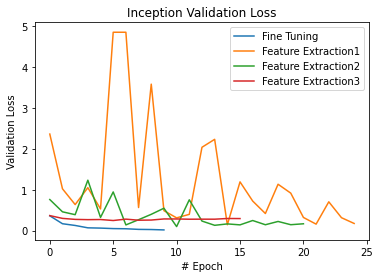

In [ ]:
plt.plot(inception_ft)
plt.plot(inception_fe1)
plt.plot(inception_fe2)
plt.plot(inception_fe3)

plt.legend(['Fine Tuning', 'Feature Extraction1', 'Feature Extraction2', 'Feature Extraction3'], loc='upper right')
plt.xlabel('# Epoch')
plt.ylabel('Validation Loss')
plt.title('Inception Validation Loss')

plt.show()

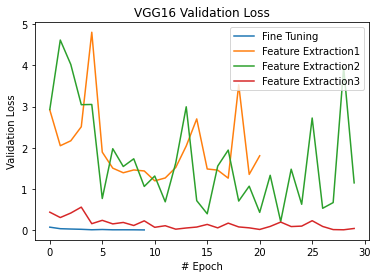

In [ ]:
plt.plot(vgg_ft)
plt.plot(vgg_fe1)
plt.plot(vgg_fe2)
plt.plot(vgg_fe3)

plt.legend(['Fine Tuning', 'Feature Extraction1', 'Feature Extraction2', 'Feature Extraction3'], loc='upper right')
plt.xlabel('# Epoch')
plt.ylabel('Validation Loss')
plt.title('VGG16 Validation Loss')

plt.show()

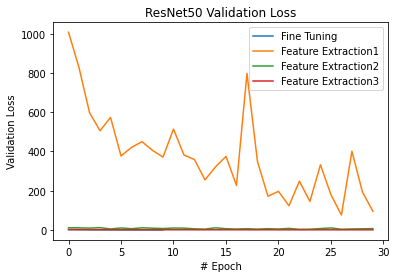

In [ ]:
plt.plot(resnet_ft)
plt.plot(resnet_fe1)
plt.plot(resnet_fe2)
plt.plot(resnet_fe3)

plt.legend(['Fine Tuning', 'Feature Extraction1', 'Feature Extraction2', 'Feature Extraction3'], loc='upper right')
plt.xlabel('# Epoch')
plt.ylabel('Validation Loss')
plt.title('ResNet50 Validation Loss')

plt.show()